# Predicting CO2 Emission of Cars

In this notebbok, we'll use Linear regression model to predict the co2 emission by cars.

In [1]:
#Let's import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

We have a csv data file. We'll import it in a dataframe.

In [2]:
df = pd.read_csv("vehicle_data.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


First we need to clean the data. For that look if there are any empty cells or missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


There are 1066 rows, all of which are non-null for all the labels. 
So we don't need to drop any rows.

In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


This are the numeric valued labels.
Let's use them as independent variables.

In [5]:
num_cols=['VEHICLECLASS','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']
X = df[num_cols]
X.head(10)

,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,COMPACT,2.0,4,9.9,6.7,8.5,196
1,COMPACT,2.4,4,11.2,7.7,9.6,221
2,COMPACT,1.5,4,6.0,5.8,5.9,136
3,SUV - SMALL,3.5,6,12.7,9.1,11.1,255
4,SUV - SMALL,3.5,6,12.1,8.7,10.6,244
5,MID-SIZE,3.5,6,11.9,7.7,10.0,230
6,MID-SIZE,3.5,6,11.8,8.1,10.1,232
7,MID-SIZE,3.7,6,12.8,9.0,11.1,255
8,MID-SIZE,3.7,6,13.4,9.5,11.6,267
9,COMPACT,2.4,4,10.6,7.5,9.2,212


## EDA
now let's perform some exploratory data analysis on our data.
for that let's get relaion bw different labels and y, i.e. emission

In [6]:
Y = X.CO2EMISSIONS
Y.head(10)

0    196
1    221
2    136
3    255
4    244
5    230
6    232
7    255
8    267
9    212
Name: CO2EMISSIONS, dtype: int64

In [7]:
X.CYLINDERS.value_counts()

4     420
6     356
8     252
12     17
10      9
5       9
3       4
Name: CYLINDERS, dtype: int64

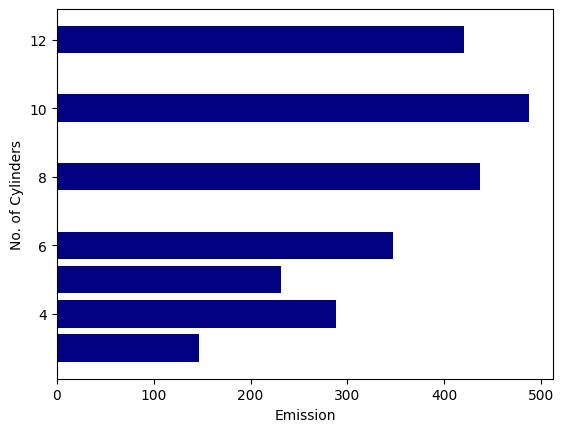

In [8]:
#plt.scatter(X.CYLINDERS, X.CO2EMISSIONS, color='aqua', label='scatter')
plt.barh(X.CYLINDERS, X.CO2EMISSIONS, color='navy')
plt.xlabel('Emission')
plt.ylabel('No. of Cylinders')
plt.show()

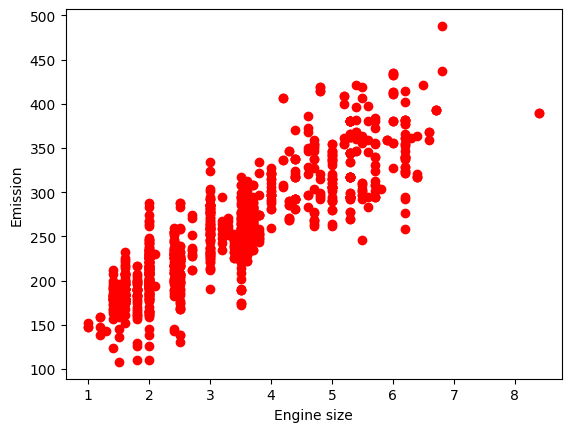

In [9]:
plt.scatter(X.ENGINESIZE, X.CO2EMISSIONS, color='red')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

In [10]:
#let's check the percentage of different vehicle classes
veh_counts=df.VEHICLECLASS.value_counts()
veh_counts.head()

MID-SIZE          178
COMPACT           172
SUV - SMALL       154
SUV - STANDARD    110
FULL-SIZE          86
Name: VEHICLECLASS, dtype: int64

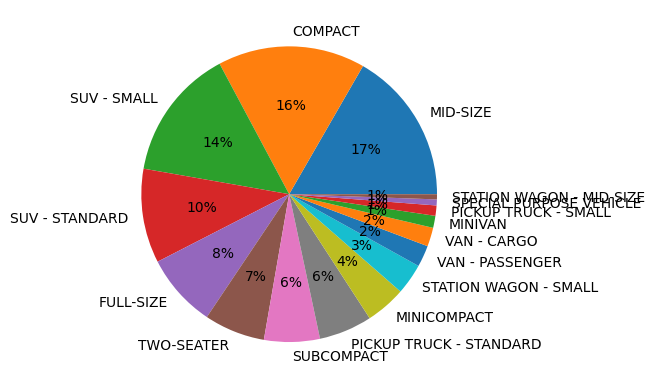

In [11]:
plt.pie(veh_counts.values, labels=veh_counts.index,autopct='%0.f%%')
plt.show()

It is clear from the pie chart above, that the Mid-size cars have the most percentage in the dataset.

Now we'll check the dependence of vehicle class on its emisson.

In [12]:
veh_class=pd.DataFrame(df.groupby('VEHICLECLASS')['CO2EMISSIONS'].mean())
veh_class.sort_values(by=['CO2EMISSIONS'], ascending=False)

,CO2EMISSIONS
VEHICLECLASS,
VAN - PASSENGER,401.000000
VAN - CARGO,361.500000
PICKUP TRUCK - STANDARD,309.096774
SUV - STANDARD,307.672727
PICKUP TRUCK - SMALL,284.250000
FULL-SIZE,267.651163
TWO-SEATER,265.676056
MINIVAN,260.142857
SUBCOMPACT,252.615385


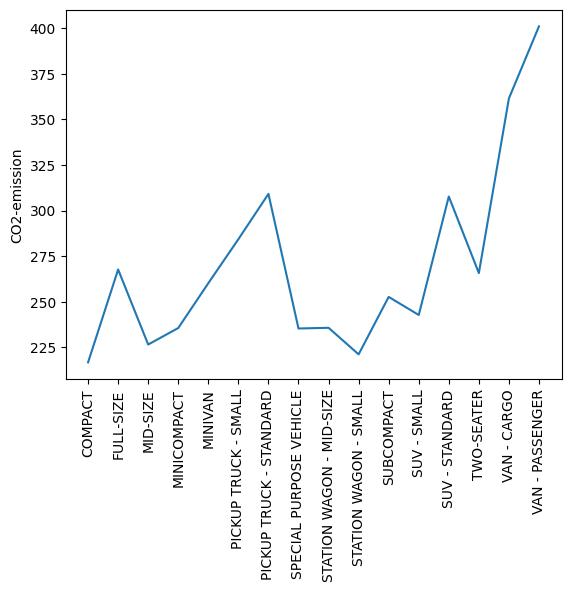

In [16]:
#To check the dependence
plt.plot(veh_class.index, veh_class.values)
#plt.xlabel('Car-class')
plt.ylabel('CO2-emission')
plt.xticks(rotation='vertical')
plt.show()

Now let's create a new column to add to X, to show dependence of emission on vehicle class

In [14]:
X.replace(df.VEHICLECLASS , df.groupby('VEHICLECLASS')['CO2EMISSIONS'].mean(), inplace=True)
X.head()

,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,COMPACT,2.0,4,9.9,6.7,8.5,196
1,COMPACT,2.4,4,11.2,7.7,9.6,221
2,COMPACT,1.5,4,6.0,5.8,5.9,136
3,SUV - SMALL,3.5,6,12.7,9.1,11.1,255
4,SUV - SMALL,3.5,6,12.1,8.7,10.6,244
